In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data\Advertising.csv")

In [5]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [6]:
X = df.drop("sales", axis=1)

In [7]:
y = df["sales"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
print(len(X_train))
print(len(X_test))

160
40


In [11]:
from sklearn.linear_model import LinearRegression

In [ ]:
help(LinearRegression)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
test_predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
df["sales"].mean()

14.022500000000003

In [17]:
# MAE - MEAN ABSOLUTE ERROR
# avg error
mean_absolute_error(y_test, test_predictions)
# 14.02 +- mae ~1.13

1.1244750006255644

In [18]:
# RMSE - ROOT MEAN SQUARED ERROR
# Will punish far off points
np.sqrt(mean_squared_error(y_test, test_predictions))
# 14.02 +- ~1.44

1.4364605285636896

In [19]:
# RESIDUAL PLOT
# Points should be random - no curve, no clear line
test_residuals = y_test - test_predictions

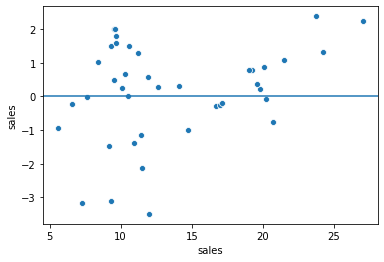

In [20]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0)

In [21]:
# Save model try
final_model = LinearRegression()

In [22]:
final_model.fit(X, y)

LinearRegression()

In [35]:
# Theta coefficeients
print(final_model.coef_)
print(X.head())
# [0] 0.04576465 - TV has positive impact on sales
# [1] 0.18853002 - radio has most impact on sales
# [2] -0.00103749 - newspaper is literraly zero and
#                  cancels out any value spent on newspaper.Even has a negative impact

print("****************")

# since all features are of the same unit (let's say $ for example)
# increase in 1 unit (TV, radi, newspaper) 
# it will increase the coefficeint * spended amout for sales
# sample row 0 TV:
print(230.1 * 0.046)

# sample row 0 radio:
print(37.8 * 0.189)

#sample row 0 newspaper:
print(69.2 * -0.001)

[ 0.04576465  0.18853002 -0.00103749]
      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
****************
10.5846
7.1442
-0.0692


In [39]:
from joblib import dump, load

In [53]:
model_save_path = "data\model_examples\linear_regression_model.joblib"

In [41]:
dump(final_model, model_save_path)

['data\\model_examples\\linear_regression_model.joblib']

In [42]:
loaded_model = load(model_save_path)

In [45]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [64]:
#149 TV, 22 Radio, 12 Newspaper
import numpy as np
sample_camp = [149, 22, 12]
sample_shape = [sample_camp]
print(loaded_model.predict(sample_shape))

#numpy
np_arr = np.array(sample_camp)
np_arr = np_arr.reshape(-1, 3)
print(loaded_model.predict(np_arr))

[13.893032]
[13.893032]
